# Modeling Process

In [ ]:
import pandas as pd
import numpy as np


# model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics


# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in the data

df = pd.read_csv('/content/drive/MyDrive/college_combine.xlsx - college_combine.csv')

In [ ]:
df.head()

,Unnamed: 0,Player,POS_x,Pk,Tm,College,Year,Body_Fat,HAND_LENGTH,HAND_WIDTH,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,...,Per 100 Poss STL,Per 100 Poss BLK,Per 100 Poss TOV,Per 100 Poss PF,Per 100 Poss PTS,Per 100 Poss ORtg,Per 100 Poss DRtg,TS%,eFG%,3PAr,FTr,PProd,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PER,OBPM,DBPM,BPM,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS)
0,0,A.J. Price,PG,52,IND,University of Connecticut,2009,0.1240,0.00,0.0,192.8,75.75,97.0,74.00,72.5,99,91.0,2914.0,429,1039,0.413,271,606,0.447,158,433,0.365,268,371,0.722,79.0,253.0,332,469,104,5,235.0,136.0,1284,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528,0.489,0.417,0.357,NaN,NaN,NaN,5.8,28.2,NaN,0.0,16.2,25.1,4.4,5.9,10.3,0.142,NaN,NaN,NaN,NaN,A.J. Price,PG,12.4,72.5,97.0,75.75,192.8,10.99,3.22,26,31,11
1,1,Aaron Brooks,PG,26,HOU,University of Oregon,2007,0.0270,0.00,0.0,161.0,76.00,94.0,71.75,70.0,115,110.0,3759.0,500,1164,0.430,295,616,0.479,205,548,0.374,306,367,0.834,86.0,311.0,397,470,127,16,303.0,265.0,1511,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.565,0.518,0.471,0.315,NaN,NaN,NaN,6.6,26.2,NaN,0.3,18.5,23.2,7.7,4.5,12.2,0.129,NaN,NaN,NaN,NaN,Aaron Brooks,PG,2.7,70.0,94.0,76.00,161,10.57,3.2,32.5,39.5,6
2,2,Aaron Gordon,PF,4,ORL,University of Arizona,2014,0.0505,8.75,10.5,220.1,83.75,105.0,80.75,79.5,38,38.0,1187.0,189,382,0.495,173,337,0.513,16,45,0.356,76,180,0.422,102.0,201.0,303,75,34,39,55.0,90.0,470,5.0,...,1.8,2.1,2.9,4.7,24.7,108.9,88.6,0.503,0.516,0.118,0.471,469.0,10.4,19.3,14.9,13.0,1.8,3.4,10.5,23.2,2.1,3.3,5.4,0.183,20.4,2.8,6.7,9.6,Aaron Gordon,PF,5.05,79.5,105.0,83.75,220.1,10.81,3.27,32.5,39,NaN
3,3,Aaron Gray,C,49,CHI,University of Pittsburgh,2007,0.1080,0.00,0.0,271.0,87.25,108.5,85.75,84.0,113,68.0,2360.0,434,789,0.550,434,789,0.550,0,0,NaN,241,405,0.595,286.0,504.0,790,147,41,130,176.0,238.0,1109,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.565,0.550,0.000,0.513,NaN,NaN,NaN,19.4,14.0,NaN,3.7,15.2,24.9,5.6,9.4,15.0,0.254,NaN,NaN,NaN,NaN,Aaron Gray,C,10.8,84.0,108.5,87.25,271,12.07,3.7,27,32.5,17
4,4,Acie Law,PG,11,ATL,Texas A&M University,2007,0.0560,0.00,0.0,186.0,78.50,98.0,75.50,74.0,122,106.0,3760.0,605,1298,0.466,491,979,0.502,114,319,0.357,345,454,0.760,56.0,323.0,379,545,156,2,299.0,323.0,1669,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.551,0.510,0.246,0.350,NaN,NaN,NaN,5.7,31.8,NaN,0.0,16.5,25.3,7.9,5.7,13.6,0.145,NaN,NaN,NaN,NaN,Acie Law,PG,5.6,74.0,98.0,78.50,186,11,3.22,29,34,8


##1) Identifiy goal, model features and output variables



## 2) EDA

1.   visualize missing values
2.   Convert to the right data type
3.   Figure out what is considered in-scope for the usecase
4.   Look at distributions and correlations 



#### 2.1 Missing values

In [ ]:
df = df.replace(0, np.nan)
df = df.replace('-', np.nan)

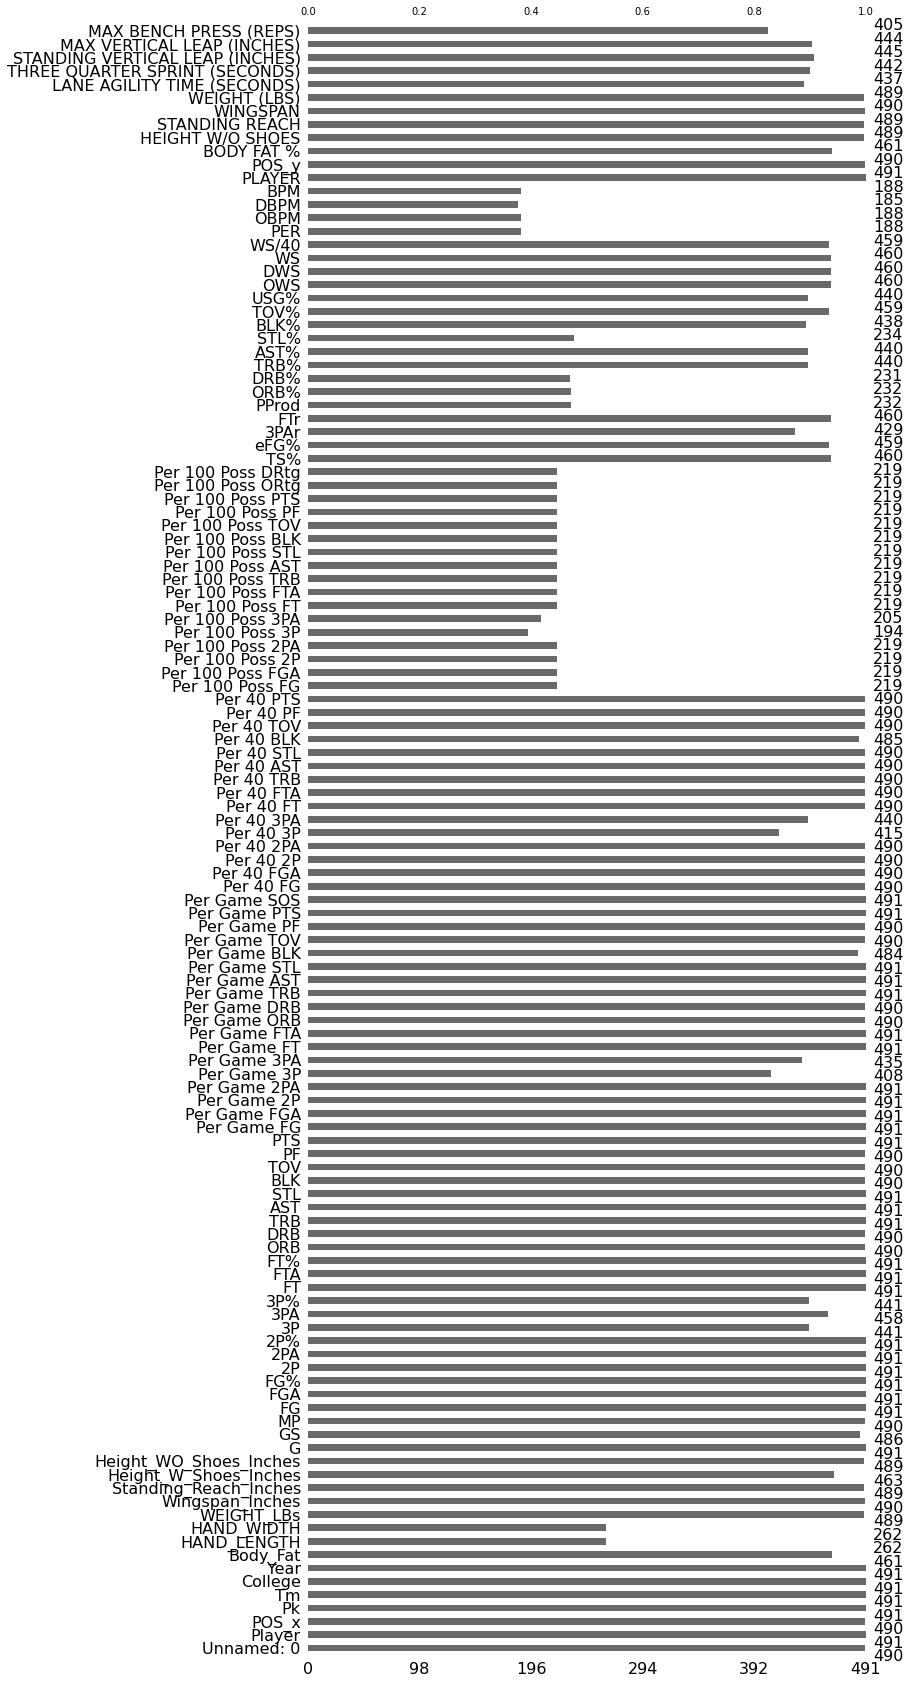

In [ ]:
import missingno as msno

msno.bar(df, figsize = (10, 30))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Columns: 122 entries, Unnamed: 0 to MAX BENCH PRESS (REPS)
dtypes: float64(96), int64(13), object(13)
memory usage: 468.1+ KB


In [ ]:
#Drop Per 100 Data and Hand width, hand length
per_100 = ['Per 100 Poss FG',	'Per 100 Poss FGA',	'Per 100 Poss 2P',	'Per 100 Poss 2PA',	'Per 100 Poss 3P',	'Per 100 Poss 3PA',	'Per 100 Poss FT',	'Per 100 Poss FTA',	'Per 100 Poss TRB',	'Per 100 Poss AST',	'Per 100 Poss STL',	'Per 100 Poss BLK',	'Per 100 Poss TOV',	'Per 100 Poss PF',	'Per 100 Poss PTS',	'Per 100 Poss ORtg',	'Per 100 Poss DRtg']
df.drop(per_100, axis = 1, inplace = True)
df.drop(['HAND_LENGTH', 'HAND_WIDTH'], axis = 1, inplace = True)
df.drop(['BPM', 'DBPM', 'OBPM', 'PER', 'STL%', 'DRB%', 'ORB%', 'PProd'], axis = 1, inplace = True)



In [ ]:
##Drop per 40 stats
df
per_40 =['Per 40 FG','Per 40 FGA','Per 40 2P','Per 40 2PA','Per 40 3P','Per 40 3PA','Per 40 FT','Per 40 FTA','Per 40 TRB','Per 40 AST','Per 40 STL','Per 40 BLK','Per 40 TOV','Per 40 PF','Per 40 PTS']
df.drop(per_40, axis = 1, inplace = True)

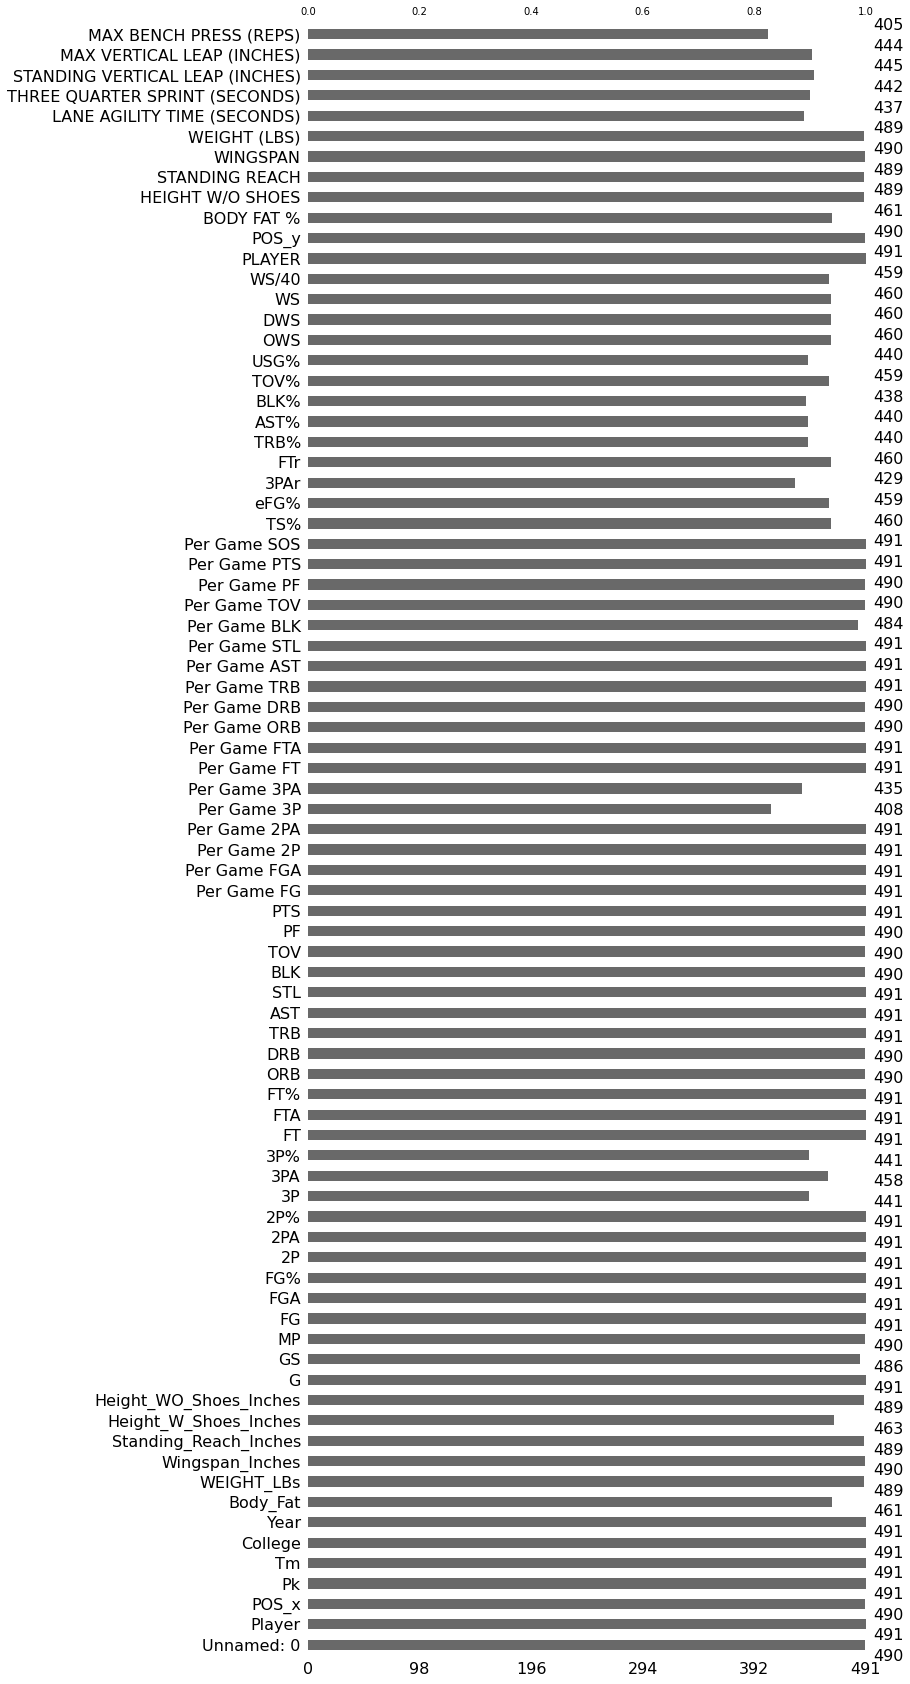

In [ ]:
import missingno as msno

msno.bar(df, figsize = (10, 30))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       490 non-null    float64
 1   Player                           491 non-null    object 
 2   POS_x                            490 non-null    object 
 3   Pk                               491 non-null    int64  
 4   Tm                               491 non-null    object 
 5   College                          491 non-null    object 
 6   Year                             491 non-null    int64  
 7   Body_Fat                         461 non-null    float64
 8   WEIGHT_LBs                       489 non-null    float64
 9   Wingspan_Inches                  490 non-null    float64
 10  Standing_Reach_Inches            489 non-null    float64
 11  Height_W_Shoes_Inches            463 non-null    float64
 12  Height_WO_Shoes_Inches

#### 2.2 Covert to correct format

In [ ]:
float_columns = ['WEIGHT (LBS)', 'LANE AGILITY TIME (SECONDS)', 'THREE QUARTER SPRINT (SECONDS)', 'STANDING VERTICAL LEAP (INCHES)', 'MAX VERTICAL LEAP (INCHES)', 'MAX BENCH PRESS (REPS)']
df[float_columns]= df[float_columns].astype(float)

In [ ]:
df.dtypes

Unnamed: 0                         float64
Player                              object
POS_x                               object
Pk                                   int64
Tm                                  object
                                    ...   
LANE AGILITY TIME (SECONDS)        float64
THREE QUARTER SPRINT (SECONDS)     float64
STANDING VERTICAL LEAP (INCHES)    float64
MAX VERTICAL LEAP (INCHES)         float64
MAX BENCH PRESS (REPS)             float64
Length: 80, dtype: object

In [ ]:
# Change NaN 3PT% cells to 0

df['3P%'] = df['3P%'].replace(np.nan, 0)

In [ ]:
# Check for NaN cells

df['3P%'].isnull().sum()

0

In [ ]:
top_rows = []
middle_rows = []
bottom_rows = []

#1-20 is top -- 1
#21-40 is middle -- 2
#41-60 is bottom -- 3

df['Thirds'] = np.nan

for i in range(len(df)):
  if df['Pk'].iloc[i] <= 30:
    top_rows.append(i)
  elif 21 <= df['Pk'].iloc[i] <= 31:
    middle_rows.append(i)
  elif df['Pk'].iloc[i] >= 41:
    bottom_rows.append(i)

for i in range(len(df)):
  if i in top_rows:
    df['Thirds'].iloc[i] = 1
  if i in middle_rows:
    df['Thirds'].iloc[i] = 2
  if i in bottom_rows:
    df['Thirds'].iloc[i] = 3

first_round = []
second_round = []

df['Round'] = np.nan
for i in range(len(df)):
  if df['Pk'].iloc[i] <= 30:
    first_round.append(i)
  elif df['Pk'].iloc[i] >= 31:
    second_round.append(i)

for i in range(len(df)):
  if i in first_round:
    df['Round'].iloc[i] = 1
  if i in second_round:
    df['Round'].iloc[i] = 2

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Unnamed: 0,Player,POS_x,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round
0,NaN,A.J. Price,PG,52,IND,University of Connecticut,2009,0.1240,192.8,75.75,97.0,74.00,72.5,99,91.0,2914.0,429,1039,0.413,271,606,0.447,158.0,433.0,0.365,268,371,0.722,79.0,253.0,332,469,104,5.0,235.0,136.0,1284,4.3,10.5,2.7,...,4.4,2.7,3.7,0.8,2.6,3.4,4.7,1.1,0.1,2.4,1.4,13.0,7.14,0.528,0.489,0.417,0.357,5.8,28.2,NaN,16.2,25.1,4.4,5.9,10.3,0.142,A.J. Price,PG,12.4,72.5,97.0,75.75,192.8,10.99,3.22,26.0,31.0,11.0,3.0,2.0
1,1.0,Aaron Brooks,PG,26,HOU,University of Oregon,2007,0.0270,161.0,76.00,94.0,71.75,70.0,115,110.0,3759.0,500,1164,0.430,295,616,0.479,205.0,548.0,0.374,306,367,0.834,86.0,311.0,397,470,127,16.0,303.0,265.0,1511,4.3,10.1,2.6,...,4.8,2.7,3.2,0.7,2.7,3.5,4.1,1.1,0.1,2.6,2.3,13.1,6.68,0.565,0.518,0.471,0.315,6.6,26.2,0.3,18.5,23.2,7.7,4.5,12.2,0.129,Aaron Brooks,PG,2.7,70.0,94.0,76.00,161.0,10.57,3.20,32.5,39.5,6.0,1.0,1.0
2,2.0,Aaron Gordon,PF,4,ORL,University of Arizona,2014,0.0505,220.1,83.75,105.0,80.75,79.5,38,38.0,1187.0,189,382,0.495,173,337,0.513,16.0,45.0,0.356,76,180,0.422,102.0,201.0,303,75,34,39.0,55.0,90.0,470,5.0,10.1,4.6,...,1.2,2.0,4.7,2.7,5.3,8.0,2.0,0.9,1.0,1.4,2.4,12.4,9.04,0.503,0.516,0.118,0.471,14.9,13.0,3.4,10.5,23.2,2.1,3.3,5.4,0.183,Aaron Gordon,PF,5.05,79.5,105.0,83.75,220.1,10.81,3.27,32.5,39.0,NaN,1.0,1.0
3,3.0,Aaron Gray,C,49,CHI,University of Pittsburgh,2007,0.1080,271.0,87.25,108.5,85.75,84.0,113,68.0,2360.0,434,789,0.550,434,789,0.550,NaN,NaN,0.000,241,405,0.595,286.0,504.0,790,147,41,130.0,176.0,238.0,1109,3.8,7.0,3.8,...,NaN,2.1,3.6,2.5,4.5,7.0,1.3,0.4,1.2,1.6,2.1,9.8,6.94,0.565,0.550,NaN,0.513,19.4,14.0,3.7,15.2,24.9,5.6,9.4,15.0,0.254,Aaron Gray,C,10.8,84.0,108.5,87.25,271.0,12.07,3.70,27.0,32.5,17.0,3.0,2.0
4,4.0,Acie Law,PG,11,ATL,Texas A&M University,2007,0.0560,186.0,78.50,98.0,75.50,74.0,122,106.0,3760.0,605,1298,0.466,491,979,0.502,114.0,319.0,0.357,345,454,0.760,56.0,323.0,379,545,156,2.0,299.0,323.0,1669,5.0,10.6,4.0,...,2.6,2.8,3.7,0.5,2.6,3.1,4.5,1.3,NaN,2.5,2.6,13.7,4.53,0.551,0.510,0.246,0.350,5.7,31.8,NaN,16.5,25.3,7.9,5.7,13.6,0.145,Acie Law,PG,5.6,74.0,98.0,78.50,186.0,11.00,3.22,29.0,34.0,8.0,1.0,1.0


In [ ]:
# Check different types of positions

df.rename(columns = {'POS_x':'POS'}, inplace = True)

df.groupby('POS').count().sort_values(by = 'POS')

,Unnamed: 0,Player,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,Per Game 2PA,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round
POS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,24,24,24,24,24,24,24,23,24,23,23,23,24,23,24,24,24,24,24,24,24,6,11,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,...,6,24,24,24,24,24,24,24,24,24,24,24,24,24,23,11,24,21,21,21,24,21,24,24,24,24,24,24,24,23,23,24,23,18,18,18,18,16,22,24
C-PF,16,16,16,16,16,16,15,16,16,16,15,16,16,16,16,16,16,16,16,16,16,9,11,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,8,16,16,16,16,16,16,16,16,16,16,16,16,16,16,11,16,16,16,16,16,16,16,16,16,16,16,16,15,16,16,16,16,14,14,14,14,14,15,16
PF,82,82,82,82,82,82,75,82,82,82,79,82,82,82,82,82,82,82,82,82,82,64,71,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,...,62,82,82,82,82,82,82,82,82,82,82,82,82,78,78,69,78,76,76,76,78,76,78,78,78,78,82,82,75,82,82,82,82,72,73,74,74,63,65,82
PF-C,19,19,19,19,19,19,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,12,15,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,...,10,19,19,19,19,19,19,19,19,19,19,19,19,18,18,14,18,17,17,17,18,17,18,18,18,18,19,19,18,19,19,19,19,17,17,17,17,17,15,19
PF-SF,23,23,23,23,23,23,20,23,23,23,19,23,23,21,22,23,23,23,23,23,23,23,23,23,23,23,23,22,22,23,23,23,22,22,22,23,23,23,23,23,...,22,23,23,22,22,23,23,23,22,22,22,23,23,19,19,19,19,18,18,18,18,18,19,19,19,18,23,23,20,23,23,23,23,20,22,22,22,22,17,23
PG,79,80,80,80,80,80,76,79,79,79,75,79,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,77,80,80,80,80,80,80,80,80,75,75,73,80,75,80,80,80,80,80,80,76,79,79,79,79,70,70,71,70,63,71,80
PG-SG,33,33,33,33,33,33,30,33,33,33,30,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33,33,33,33,28,28,28,28,27,27,27,28,27,28,28,28,28,33,33,30,33,33,33,33,28,28,28,28,29,31,33
SF,56,56,56,56,56,56,55,56,56,56,53,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,56,56,56,56,56,53,53,53,53,52,52,52,53,52,53,53,53,53,56,56,55,56,56,56,56,51,51,50,51,44,42,56
SF-PF,16,16,16,16,16,16,15,16,16,16,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,16,15,16,16,16,16,16,16,15,16,16,16,16,15,15,16,15,15,14,16


In [ ]:
# Re-sort positions

df['POS'] = df['POS'].replace('C-PF', 2)
df['POS'] = df['POS'].replace('PF', 1)
df['POS'] = df['POS'].replace('PF-C', 2)
df['POS'] = df['POS'].replace('PF-SF', 1)
df['POS'] = df['POS'].replace('PG', 0)
df['POS'] = df['POS'].replace('PG-SG', 0)
df['POS'] = df['POS'].replace('SF', 1)
df['POS'] = df['POS'].replace('SF-PF', 1)
df['POS'] = df['POS'].replace('SF-SG', 1)
df['POS'] = df['POS'].replace('SG', 0)
df['POS'] = df['POS'].replace('SG-PG', 0)
df['POS'] = df['POS'].replace('SG-SF', 0)
df['POS'] = df['POS'].replace('C', 2)

df.groupby('POS').count()

,Unnamed: 0,Player,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,Per Game 2PA,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round
POS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,231,232,232,232,232,232,220,231,231,231,218,231,232,230,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,...,232,232,232,232,232,232,232,232,226,232,232,232,232,216,216,216,216,205,205,203,216,205,216,216,216,216,232,232,220,231,231,231,231,209,210,212,211,193,205,232
1.0,199,199,199,199,199,199,184,199,199,199,187,199,199,197,198,199,199,199,199,199,199,181,188,199,199,199,199,198,198,199,199,199,198,198,198,199,199,199,199,199,...,178,199,199,198,198,199,199,199,198,198,198,199,199,185,185,176,185,180,180,180,184,180,185,185,185,184,199,199,184,199,199,199,199,178,182,183,183,164,154,199
2.0,59,59,59,59,59,59,57,58,59,58,57,58,59,58,59,59,59,59,59,59,59,27,37,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,...,24,59,59,59,59,59,59,59,59,59,59,59,59,58,57,36,58,54,54,54,58,54,58,58,58,58,59,59,57,58,58,59,58,49,49,49,49,47,52,59


####2.3 Duplicate rows

In [ ]:
# Check for duplicate rows

duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Unnamed: 0,Player,POS,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round


In [ ]:
# Remove all Tony Mitchell rows

df.drop(df.index[448:455], inplace = True)

duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Unnamed: 0,Player,POS,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round


In [ ]:
# Remove all Marcus Thornton rows

df.drop(df.index[307:322], inplace = True)

duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Unnamed: 0,Player,POS,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round


####2.4 Split DataFrame

In [ ]:
#Split DataFrame

g_rows = []
f_rows = []
c_rows = []

for i in range(len(df)):
  if df['POS'].iloc[i] == 0:
    g_rows.append(i)
  elif df['POS'].iloc[i] == 1:
    f_rows.append(i)
  elif df['POS'].iloc[i] == 2:
    c_rows.append(i)

df_g = df.iloc[g_rows].copy()
df_f = df.iloc[f_rows].copy()
df_c = df.iloc[c_rows].copy()

df.groupby('POS').count()

,Unnamed: 0,Player,Pk,Tm,College,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,Per Game 2PA,...,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,PLAYER,POS_y,BODY FAT %,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS),Thirds,Round
POS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,212,213,213,213,213,213,201,212,212,212,199,212,213,211,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,207,213,213,213,213,208,208,208,208,197,197,195,208,197,208,208,208,208,213,213,201,212,212,212,212,190,191,193,192,174,190,213
1.0,196,196,196,196,196,196,181,196,196,196,184,196,196,194,195,196,196,196,196,196,196,178,185,196,196,196,196,195,195,196,196,196,195,195,195,196,196,196,196,196,...,175,196,196,195,195,196,196,196,195,195,195,196,196,185,185,176,185,180,180,180,184,180,185,185,185,184,196,196,181,196,196,196,196,175,179,180,180,161,154,196
2.0,59,59,59,59,59,59,57,58,59,58,57,58,59,58,59,59,59,59,59,59,59,27,37,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,...,24,59,59,59,59,59,59,59,59,59,59,59,59,58,57,36,58,54,54,54,58,54,58,58,58,58,59,59,57,58,58,59,58,49,49,49,49,47,52,59


###2.5 Fill missing values with means

In [ ]:
column_means_g = df_g.mean()
df_g.fillna(df_g.mean(), inplace = True)

print(column_means_g)

column_means_f = df_f.mean()
df_f.fillna(value = column_means_f, inplace = True)

column_means_c = df_c.mean()
df_c.fillna(value = column_means_c, inplace = True)

df = pd.concat([df_g, df_f, df_c])

df.info()

Unnamed: 0                          259.377358
POS                                   0.000000
Pk                                   28.469484
Year                               2009.422535
Body_Fat                              0.064582
                                      ...     
STANDING VERTICAL LEAP (INCHES)      30.224352
MAX VERTICAL LEAP (INCHES)           36.127604
MAX BENCH PRESS (REPS)                9.367816
Thirds                                1.726316
Round                                 1.436620
Length: 76, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 485
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       468 non-null    float64
 1   Player                           468 non-null    object 
 2   POS                              468 non-null    float64
 3   Pk                               468

In [ ]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 490
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       213 non-null    float64
 1   Player                           213 non-null    object 
 2   POS                              213 non-null    float64
 3   Pk                               213 non-null    int64  
 4   Tm                               213 non-null    object 
 5   College                          213 non-null    object 
 6   Year                             213 non-null    int64  
 7   Body_Fat                         213 non-null    float64
 8   WEIGHT_LBs                       213 non-null    float64
 9   Wingspan_Inches                  213 non-null    float64
 10  Standing_Reach_Inches            213 non-null    float64
 11  Height_W_Shoes_Inches            213 non-null    float64
 12  Height_WO_Shoes_Inches

In [ ]:
df_num = df.drop(['Player', 'Tm', 'College', 'PLAYER', 'POS_y', 'BODY FAT %', 'Thirds', 'Round', 'Pk'], axis = 1)

## 3) Train-Test Split 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_num, df['Round'], test_size = 0.3, random_state = 42)

## 4) Feature Engineering

#### 4.1 Create 3 Random Forests

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 485
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       431 non-null    float64
 1   Player                           431 non-null    object 
 2   POS                              431 non-null    float64
 3   Pk                               431 non-null    int64  
 4   Tm                               431 non-null    object 
 5   College                          431 non-null    object 
 6   Year                             431 non-null    int64  
 7   Body_Fat                         431 non-null    float64
 8   WEIGHT_LBs                       431 non-null    float64
 9   Wingspan_Inches                  431 non-null    float64
 10  Standing_Reach_Inches            431 non-null    float64
 11  Height_W_Shoes_Inches            431 non-null    float64
 12  Height_WO_Shoes_Inches

In [ ]:
df_g_output = df_g['Thirds']
df_g_input = df_g.drop(['BODY FAT %','Player', 'PLAYER', 'Pk', 'Tm', 'College', 'POS_y', 'Thirds', 'Round'], axis = 1)

df_g_input.head()

,Unnamed: 0,POS,Year,Body_Fat,WEIGHT_LBs,Wingspan_Inches,Standing_Reach_Inches,Height_W_Shoes_Inches,Height_WO_Shoes_Inches,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Per Game FG,Per Game FGA,Per Game 2P,Per Game 2PA,Per Game 3P,Per Game 3PA,Per Game FT,Per Game FTA,Per Game ORB,Per Game DRB,Per Game TRB,Per Game AST,Per Game STL,Per Game BLK,Per Game TOV,Per Game PF,Per Game PTS,Per Game SOS,TS%,eFG%,3PAr,FTr,TRB%,AST%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,HEIGHT W/O SHOES,STANDING REACH,WINGSPAN,WEIGHT (LBS),LANE AGILITY TIME (SECONDS),THREE QUARTER SPRINT (SECONDS),STANDING VERTICAL LEAP (INCHES),MAX VERTICAL LEAP (INCHES),MAX BENCH PRESS (REPS)
0,259.377358,0.0,2009,0.124000,192.8,75.75,97.0,74.00,72.50,99,91.0,2914.0,429,1039,0.413,271,606,0.447,158.0,433.0,0.365,268,371,0.722,79.0,253.0,332,469,104,5.0,235.0,136.0,1284,4.3,10.5,2.7,6.1,1.6,4.4,2.7,3.7,0.8,2.6,3.4,4.7,1.1,0.100000,2.4,1.4,13.0,7.14,0.528,0.489,0.417,0.357,5.8,28.2,1.033846,16.2,25.1,4.4,5.9,10.3,0.142,72.50,97.0,75.75,192.8,10.99,3.22,26.0,31.0,11.0
1,1.000000,0.0,2007,0.027000,161.0,76.00,94.0,71.75,70.00,115,110.0,3759.0,500,1164,0.430,295,616,0.479,205.0,548.0,0.374,306,367,0.834,86.0,311.0,397,470,127,16.0,303.0,265.0,1511,4.3,10.1,2.6,5.4,1.8,4.8,2.7,3.2,0.7,2.7,3.5,4.1,1.1,0.100000,2.6,2.3,13.1,6.68,0.565,0.518,0.471,0.315,6.6,26.2,0.300000,18.5,23.2,7.7,4.5,12.2,0.129,70.00,94.0,76.00,161.0,10.57,3.20,32.5,39.5,6.0
4,4.000000,0.0,2007,0.056000,186.0,78.50,98.0,75.50,74.00,122,106.0,3760.0,605,1298,0.466,491,979,0.502,114.0,319.0,0.357,345,454,0.760,56.0,323.0,379,545,156,2.0,299.0,323.0,1669,5.0,10.6,4.0,8.0,0.9,2.6,2.8,3.7,0.5,2.6,3.1,4.5,1.3,0.352657,2.5,2.6,13.7,4.53,0.551,0.510,0.246,0.350,5.7,31.8,1.033846,16.5,25.3,7.9,5.7,13.6,0.145,74.00,98.0,78.50,186.0,11.00,3.22,29.0,34.0,8.0
11,11.000000,0.0,2011,0.051000,192.6,82.00,103.5,78.00,77.00,68,67.0,2100.0,423,855,0.495,376,705,0.533,47.0,150.0,0.313,398,495,0.804,149.0,248.0,397,165,76,24.0,157.0,163.0,1291,6.2,12.6,5.5,10.4,0.7,2.2,5.9,7.3,2.2,3.6,5.8,2.4,1.1,0.400000,2.3,2.4,19.0,6.65,0.592,0.522,0.175,0.579,11.3,17.0,1.200000,12.6,30.0,9.2,1.6,10.8,0.206,77.00,103.5,82.00,192.6,10.96,3.17,29.0,36.0,5.0
12,12.000000,0.0,2005,0.064582,183.0,84.00,102.5,76.75,75.75,88,80.0,3023.0,449,983,0.457,329,691,0.476,120.0,292.0,0.411,255,310,0.823,136.0,359.0,495,249,133,38.0,230.0,167.0,1273,5.1,11.2,3.7,7.9,1.4,3.3,2.9,3.5,1.5,4.1,5.6,2.8,1.5,0.400000,2.6,1.9,14.5,1.80,0.563,0.518,0.297,0.315,9.5,19.9,0.900000,16.9,22.2,5.9,3.1,9.0,0.119,75.75,102.5,84.00,183.0,11.67,3.35,28.0,32.0,11.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

leaf = np.arange(10,30,3)
depths = np.arange(1,15)
param = {'min_samples_leaf': leaf,
         'max_depth': depths}

random_forest_g = RandomForestClassifier()

grid_search_g = GridSearchCV(estimator = random_forest_g, 
                           param_grid = param ,
                           cv = 3, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score=True )

grid_search_g.fit(df_g_input, df_g_output)

KeyboardInterrupt: ignored

In [ ]:
grid_search_g.best_params_

In [ ]:
forest_g = RandomForestClassifier(max_depth = 10, min_samples_leaf =  10)

forest_g = forest_g.fit(df_g_input, df_g_output)

####4.2 Check feature importances to choose features

In [ ]:
importances_g = forest_g.feature_importances_

forest_importances_g = pd.Series(importances_g, index = df_g_input.columns).sort_values()
print(forest_importances_g[-10:])
fig, ax = plt.subplots(figsize = (40, 20))
forest_importances_g.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

In [ ]:
df_f_output = df_f['Thirds']
df_f_input = df_f.drop(['BODY FAT %','Player', 'PLAYER', 'Pk', 'Tm', 'College', 'POS_y', 'Thirds'], axis = 1)

leaf = np.arange(10,30,3)
depths = np.arange(1,15)
param = {'min_samples_leaf': leaf,
         'max_depth': depths}

random_forest_f = RandomForestClassifier()

grid_search_f = GridSearchCV(estimator = random_forest_f, 
                           param_grid = param ,
                           cv = 3, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score=True )

grid_search_f.fit(df_f_input, df_f_output)

grid_search_f.best_params_

In [ ]:
forest_f = RandomForestClassifier(max_depth = 13, min_samples_leaf =  13)

forest_f = forest_f.fit(df_f_input, df_f_output)

importances_f = forest_f.feature_importances_

forest_importances_f = pd.Series(importances_f, index = df_f_input.columns).sort_values()
print(forest_importances_f[-10:])
fig, ax = plt.subplots(figsize = (40, 20))
forest_importances_f.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

In [ ]:
df_c_output = df_c['Thirds']
df_c_input = df_c.drop(['BODY FAT %','Player', 'PLAYER', 'Pk', 'Tm', 'College', 'POS_y', 'Thirds'], axis = 1)

leaf = np.arange(10,30,3)
depths = np.arange(1,15)
param = {'min_samples_leaf': leaf,
         'max_depth': depths}

random_forest_c = RandomForestClassifier()

grid_search_c = GridSearchCV(estimator = random_forest_c, 
                           param_grid = param ,
                           cv = 3, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score=True )

grid_search_c.fit(df_c_input, df_c_output)

grid_search_c.best_params_

In [ ]:
forest_c = RandomForestClassifier(max_depth = 1, min_samples_leaf =  10)

forest_c = forest_c.fit(df_c_input, df_c_output)

importances_c = forest_c.feature_importances_

forest_importances_c = pd.Series(importances_c, index = df_c_input.columns).sort_values()
print(forest_importances_c[-10:])
fig, ax = plt.subplots(figsize = (40, 20))
forest_importances_c.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

####4.3 Check correlations for all features

IndexError: ignored

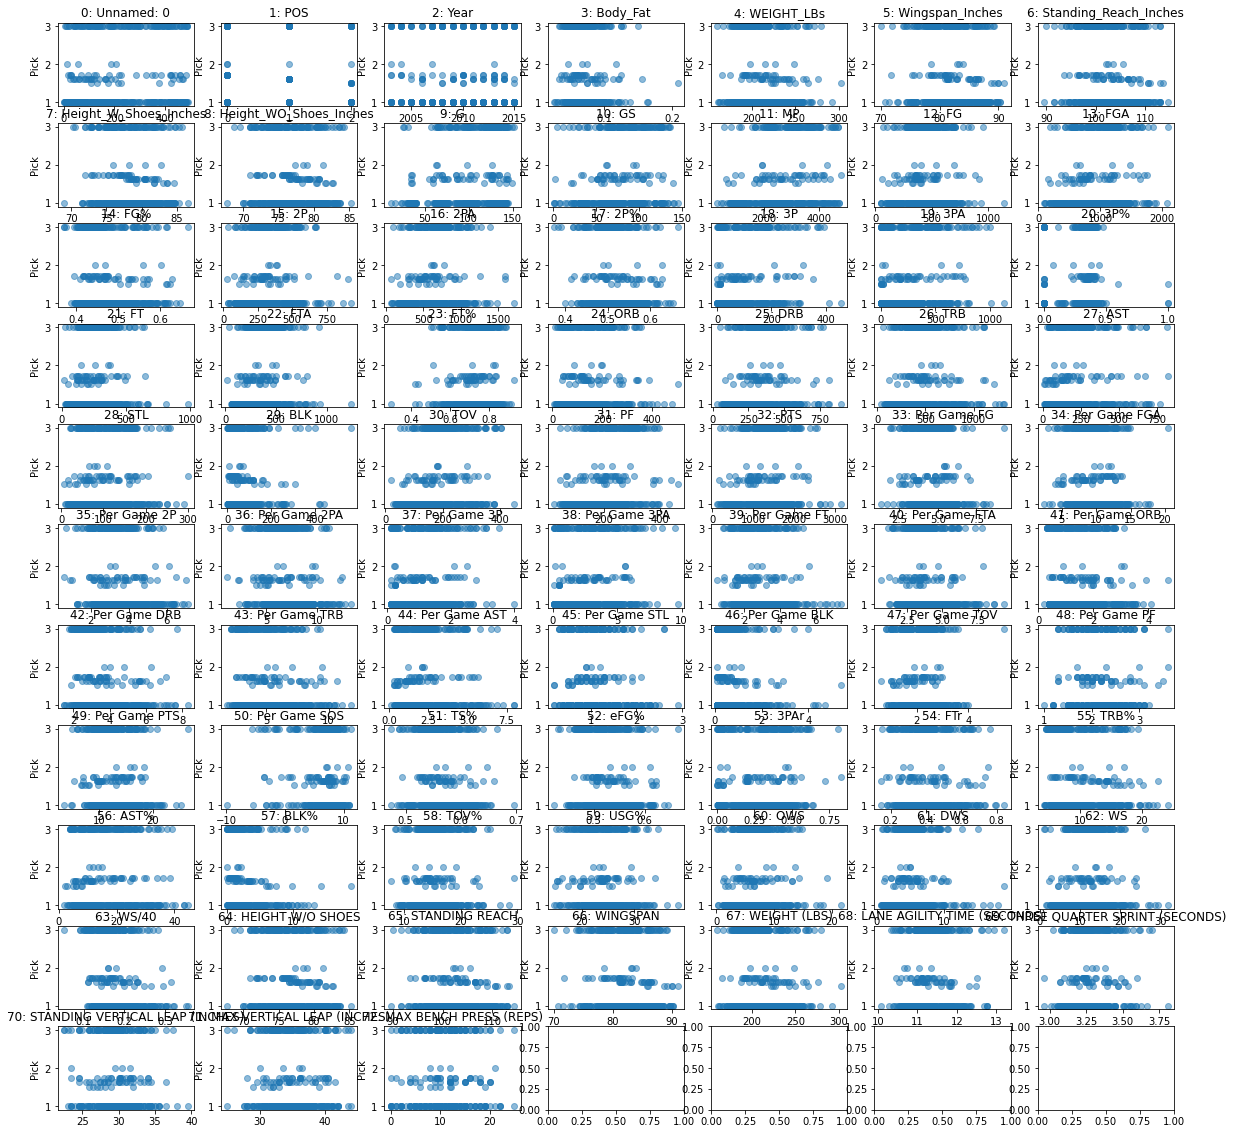

In [ ]:
df_num = df.drop(['BODY FAT %','Player', 'PLAYER', 'Pk', 'Tm', 'College', 'POS_y', 'Thirds', 'Round'], axis = 1)
fig, axes = plt.subplots(11, 7, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    ax.plot(df_num.iloc[:, i], df.Thirds, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, df_num.columns[i]))
    ax.set_ylabel("Pick")
plt.tight_layout()
plt.show()


## 5) Feature Selection

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 490
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       213 non-null    float64
 1   Player                           213 non-null    object 
 2   POS                              213 non-null    float64
 3   Pk                               213 non-null    int64  
 4   Tm                               213 non-null    object 
 5   College                          213 non-null    object 
 6   Year                             213 non-null    int64  
 7   Body_Fat                         213 non-null    float64
 8   WEIGHT_LBs                       213 non-null    float64
 9   Wingspan_Inches                  213 non-null    float64
 10  Standing_Reach_Inches            213 non-null    float64
 11  Height_W_Shoes_Inches            213 non-null    float64
 12  Height_WO_Shoes_Inches

In [ ]:
df_g.rename(columns = {'WS/40':'WS/forty'}, inplace = True)
df_f.rename(columns = {'WS/40':'WS/forty'}, inplace = True)
df_c.rename(columns = {'WS/40':'WS/forty'}, inplace = True)

gm = smf.ols(formula='Thirds ~ Q("WS/forty") + G + MP + PF + Q("Per Game SOS") + Q("MAX VERTICAL LEAP (INCHES)") + DWS + Q("eFG%") + TOV + Q("THREE QUARTER SPRINT (SECONDS)") + Q("FG%") + Q("Per Game AST") + Q("LANE AGILITY TIME (SECONDS)") + AST + Q("TS%")', data=df_g).fit()

fm = smf.ols(formula='Thirds ~ G + PF + Q("WS/forty") + MP + Q("Per Game PTS") + Q("LANE AGILITY TIME (SECONDS)") + Q("Per Game AST") + Q("Per Game FTA") + TOV + OWS + Q("TS%") + Q("Per Game FGA") + Q("Body_Fat") + Year + Q("USG%")', data=df_f).fit()

cm = smf.ols(formula='Thirds ~ Q("Per Game ORB") + G + Q("TS%") + Q("Per Game PTS") + Q("2P%") + Q("Per Game FGA") + Q("eFG%") + Q("Per Game FT") + PF + Q("Per Game TRB") + TOV + Q("WEIGHT_LBs") + Q("FT%") + Q("FG%") + MP', data=df_c).fit()

In [ ]:
gm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Thirds   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     6.180
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.38e-10
Time:                        18:47:03   Log-Likelihood:                -239.48
No. Observations:                 213   AIC:                             511.0
Df Residuals:                     197   BIC:                             564.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0387      2.919     -0.013      0.989      -5.796       5.719
Q("WS/forty")                          -6.4273      2.583     -2.488      0.014     -11.521      -1.333
G                                       0.0231      0.006      3.895      0.000       0.011       0.035
MP                                     -0.0003      0.000     -1.660      0.098      -0.001    5.57e-05
PF                                     -0.0010      0.002     -0.596      0.552      -0.004       0.002
Q("Per Game SOS")                      -0.0355      0.017     -2.048      0.042      -0.070      -0.001
Q("MAX VERTICAL LEAP (INCHES)")        -0.0187      0.019     -0.996      0.320      -0.056       0.018
DWS                                    -0.0842      0.049     -1.728      0.085      -0.180       0.012
Q("eFG%")                              -2.7581      4.263     -0.647      0.518     -11.165       5.649
TOV                                     0.0010      0.002      0.636      0.526      -0.002       0.004
Q("THREE QUARTER SPRINT (SECONDS)")     0.3527      0.631      0.558      0.577      -0.893       1.598
Q("FG%")                               -3.3657      2.355     -1.429      0.154      -8.009       1.278
Q("Per Game AST")                       0.0447      0.101      0.441      0.660      -0.155       0.244
Q("LANE AGILITY TIME (SECONDS)")        0.2518      0.143      1.763      0.080      -0.030       0.534
AST                                    -0.0011      0.001     -0.964      0.336      -0.003       0.001
Q("TS%")                                3.4771      4.788      0.726      0.469      -5.964      12.919
==============================================================================
Omnibus:                       18.208   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.197
Skew:                           0.369   Prob(JB):                      0.00611
Kurtosis:                       2.223   Cond. No.                     3.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Thirds   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     5.019
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           3.30e-08
Time:                        18:47:03   Log-Likelihood:                -200.10
No. Observations:                 196   AIC:                             432.2
Df Residuals:                     180   BIC:                             484.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           37.0878     35.180      1.054      0.293     -32.331     106.507
G                                    0.0192      0.006      3.393      0.001       0.008       0.030
PF                                  -0.0002      0.001     -0.162      0.871      -0.003       0.002
Q("WS/forty")                       -3.7073      1.572     -2.358      0.019      -6.809      -0.605
MP                                  -0.0001      0.000     -0.658      0.511      -0.001       0.000
Q("Per Game PTS")                    0.1952      0.190      1.026      0.307      -0.180       0.571
Q("LANE AGILITY TIME (SECONDS)")     0.2754      0.114      2.421      0.016       0.051       0.500
Q("Per Game AST")                   -0.0262      0.088     -0.298      0.766      -0.200       0.147
Q("Per Game FTA")                   -0.0539      0.113     -0.475      0.635      -0.278       0.170
TOV                                 -0.0020      0.002     -1.107      0.270      -0.006       0.002
OWS                                 -0.0598      0.040     -1.477      0.141      -0.140       0.020
Q("TS%")                            -1.3312      4.274     -0.311      0.756      -9.764       7.102
Q("Per Game FGA")                   -0.2155      0.212     -1.016      0.311      -0.634       0.203
Q("Body_Fat")                        4.0133      2.192      1.831      0.069      -0.312       8.339
Year                                -0.0190      0.017     -1.103      0.272      -0.053       0.015
Q("USG%")                           -0.0107      0.026     -0.405      0.686      -0.063       0.041
==============================================================================
Omnibus:                       15.263   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.351
Skew:                           0.726   Prob(JB):                     0.000171
Kurtosis:                       2.866   Cond. No.                     2.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Thirds   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2.209
Date:                Wed, 04 Aug 2021   Prob (F-statistic):             0.0216
Time:                        18:47:03   Log-Likelihood:                -54.638
No. Observations:                  59   AIC:                             141.3
Df Residuals:                      43   BIC:                             174.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.8528      4.668      2.539      0.015       2.438      21.267
Q("Per Game ORB")    -0.4842      0.432     -1.120      0.269      -1.356       0.387
G                     0.0171      0.011      1.609      0.115      -0.004       0.039
Q("TS%")              7.0888     14.772      0.480      0.634     -22.702      36.880
Q("Per Game PTS")     0.3945      0.504      0.782      0.438      -0.622       1.411
Q("2P%")            -13.8240     11.025     -1.254      0.217     -36.058       8.410
Q("Per Game FGA")    -0.3999      0.538     -0.744      0.461      -1.484       0.685
Q("eFG%")           -23.7919     12.686     -1.875      0.068     -49.377       1.793
Q("Per Game FT")     -0.1332      0.524     -0.254      0.800      -1.189       0.923
PF                   -0.0024      0.004     -0.632      0.531      -0.010       0.005
Q("Per Game TRB")     0.0625      0.162      0.386      0.702      -0.264       0.389
TOV                  -0.0016      0.003     -0.477      0.636      -0.008       0.005
Q("WEIGHT_LBs")      -0.0017      0.007     -0.235      0.815      -0.016       0.013
Q("FT%")             -4.7685      2.755     -1.731      0.091     -10.325       0.788
Q("FG%")             16.3109     10.754      1.517      0.137      -5.377      37.999
MP                 8.613e-06      0.000      0.021      0.984      -0.001       0.001
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.803
Skew:                           0.335   Prob(JB):                        0.406
Kurtosis:                       2.466   Cond. No.                     4.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
g_feat_cols = ['WS/forty', 'G', 'Per Game SOS', 'MAX VERTICAL LEAP (INCHES)', 'DWS', 'FG%'] 
f_feat_cols = ['G', 'WS/forty', 'LINE AGILITY TIMES (SECONDS)', 'Body_Fat']
c_feat_cols = ['G', 'eFG%', 'FT%', 'FG%', 'TS%']

## 6) Build Model on Training Data

In [ ]:
#from sklearn.model_selection import cross_val_score


In [ ]:
#from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
#from sklearn.linear_model import LogisticRegression

#g_lm = LogisticRegression()
#X_g = df_g[g_feat_cols]
#y_g = df_g['Thirds']


#g_scores = cross_validate(g_lm, X_g, y_g, cv=3,
#                        scoring=('r2', 'neg_mean_squared_error'),
#                        return_train_score=True)
#print((-g_scores['test_neg_mean_squared_error'])**(1/2))
#print(g_scores['train_r2'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

leaf = np.arange(10,30,3)
depths = np.arange(1,15)
param = {'min_samples_leaf': leaf,
         'max_depth': depths}

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param ,
                           cv = 5, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score=True )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 28}

In [ ]:
rf_model = RandomForestClassifier(max_depth = 2, min_samples_leaf = 28)

rf_model = rf_model.fit(X_train, y_train)

In [ ]:
pred = rf_model.predict(X_test)
pred_prob = rf_model.predict_proba(X_test)

In [ ]:
pred = pred.astype(int)
y_test = y_test.astype(int)

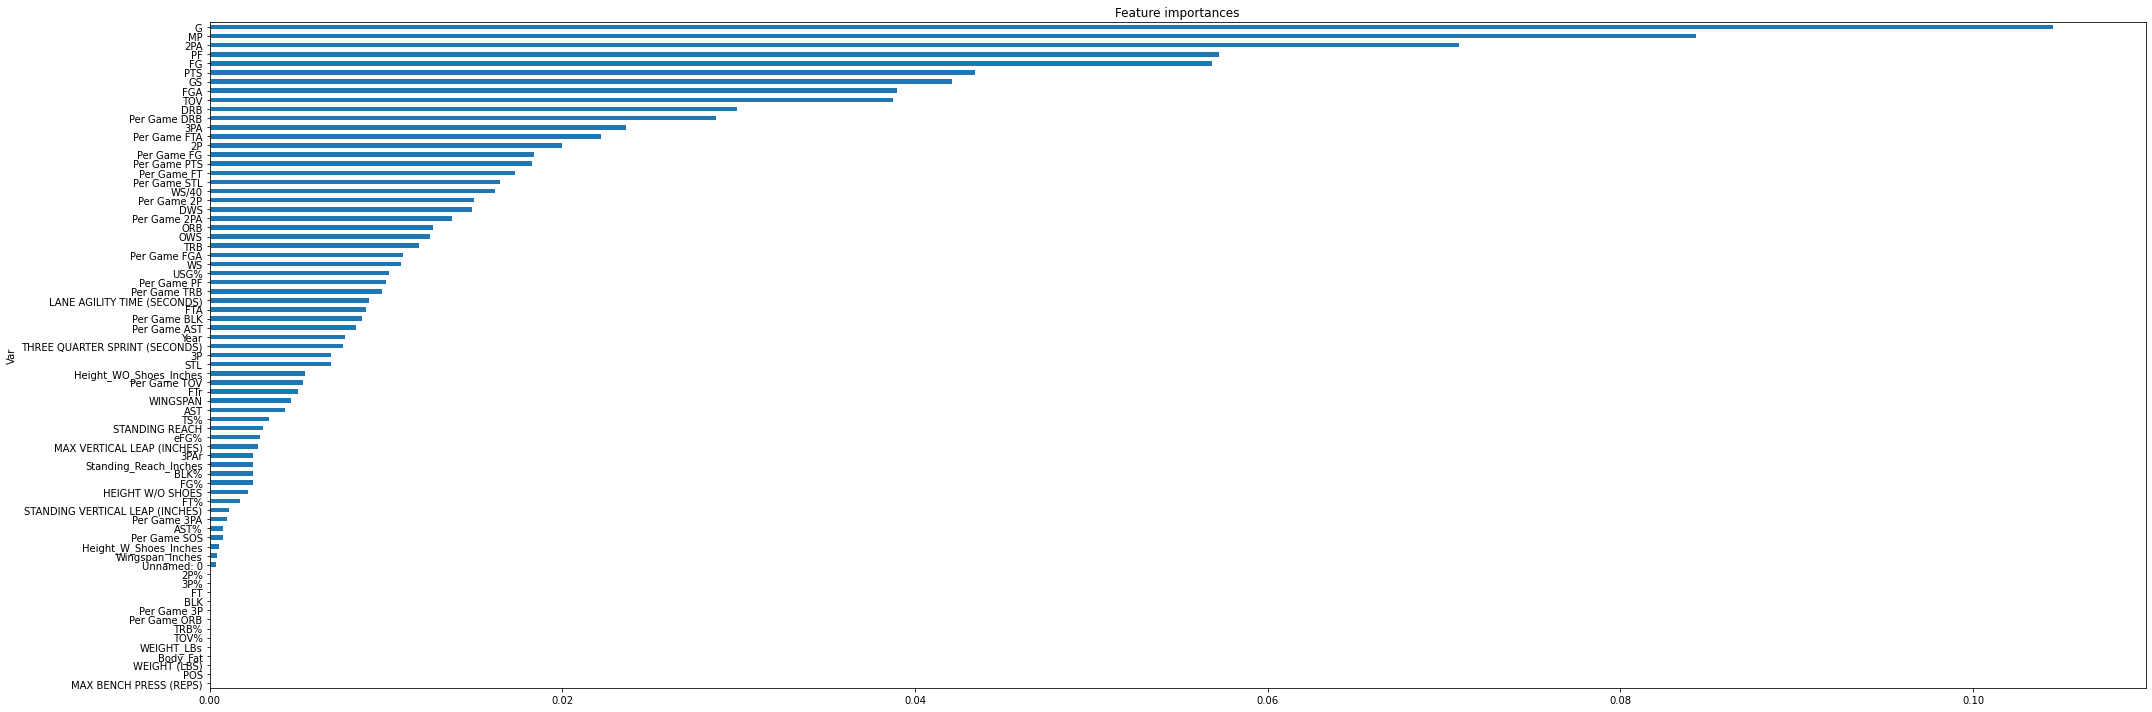

In [ ]:
importances = rf_model.feature_importances_

forest_importances = pd.Series(importances, index = df_num.columns).sort_values()
fig, ax = plt.subplots(figsize = (30, 10))
forest_importances.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

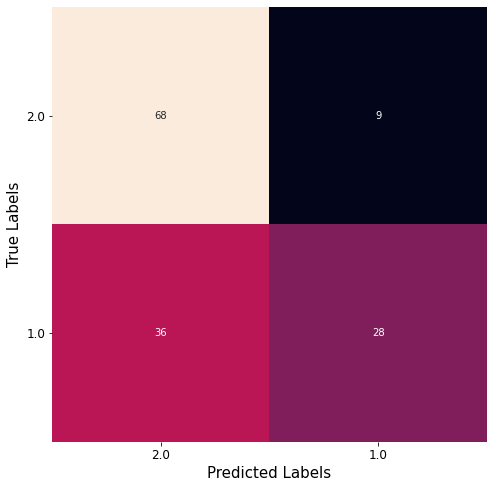

In [ ]:
from sklearn.metrics import confusion_matrix
,--
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(df['Round'], fontsize = 12)
ax.yaxis.set_ticklabels(df['Round'], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.65      0.88      0.75        77
           2       0.76      0.44      0.55        64

    accuracy                           0.68       141
   macro avg       0.71      0.66      0.65       141
weighted avg       0.70      0.68      0.66       141



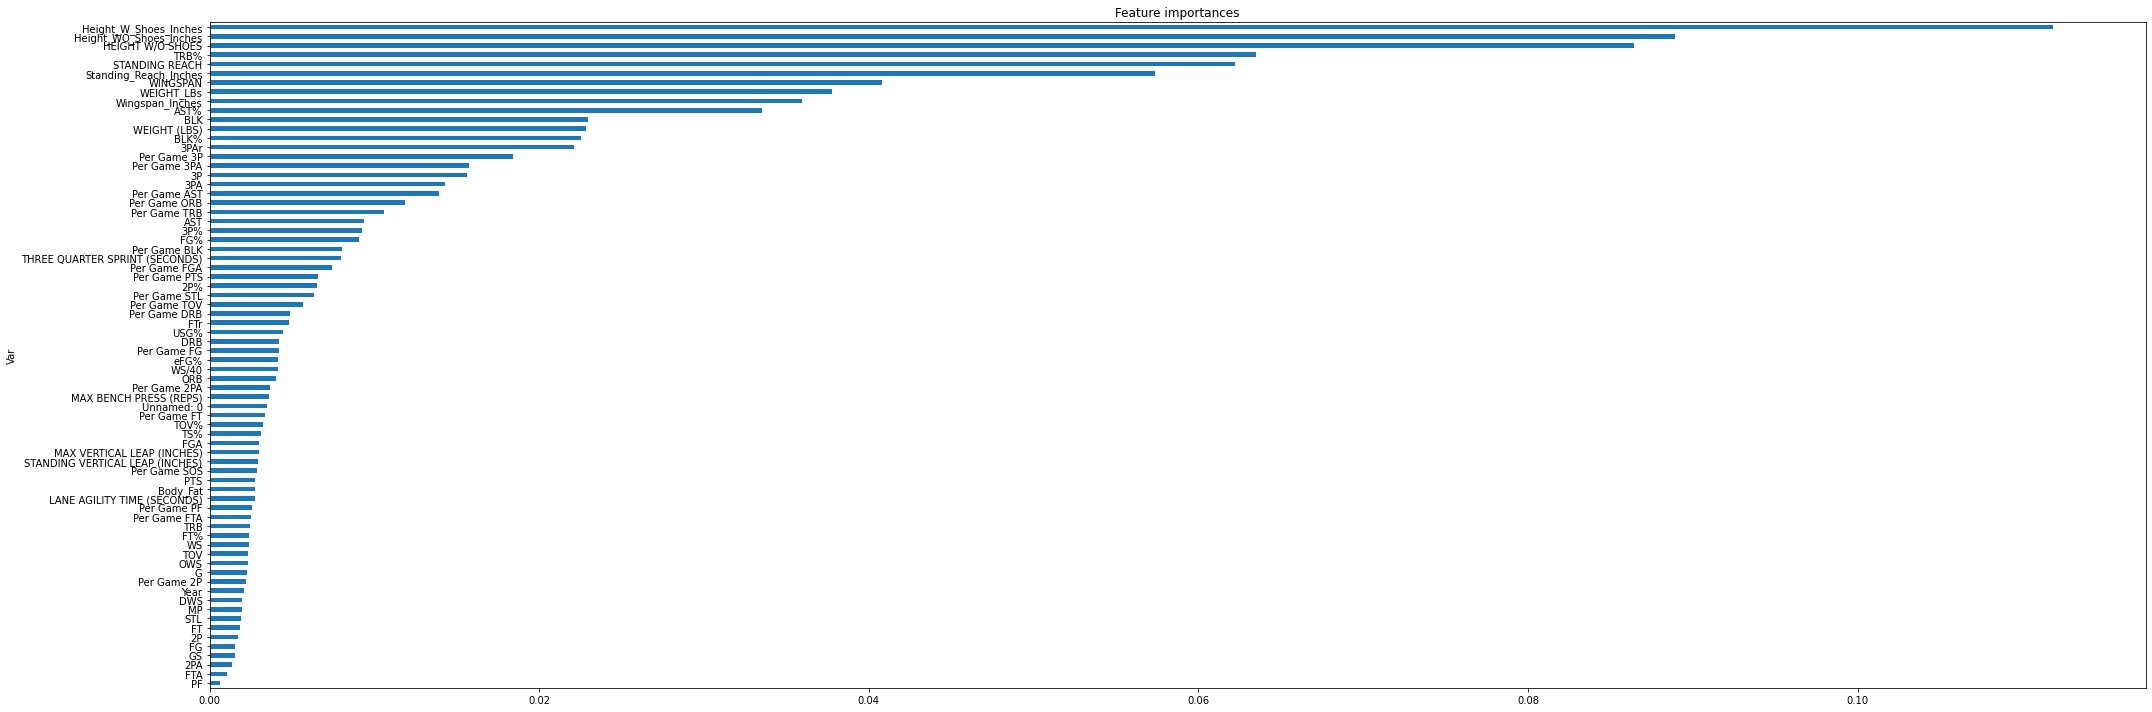

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_num.drop('POS', axis = 1), df['POS'], test_size = 0.3, random_state = 42)

rf_model = RandomForestClassifier()

rf_model = rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)
pred_prob = rf_model.predict_proba(X_test)

pred = pred.astype(int)
y_test = y_test.astype(int)

importances = rf_model.feature_importances_

forest_importances = pd.Series(importances, index = df_num.drop('POS', axis = 1).columns).sort_values()
fig, ax = plt.subplots(figsize = (30, 10))
forest_importances.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

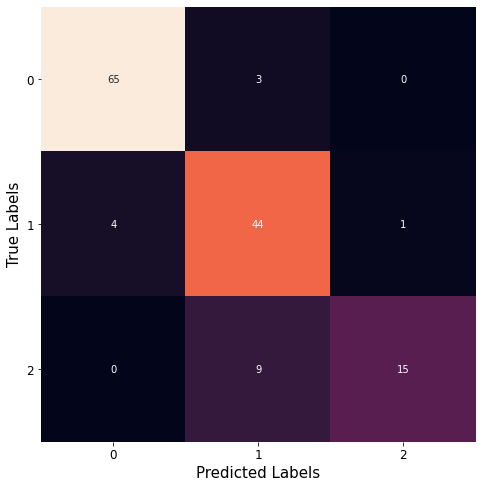

In [ ]:
from sklearn.metrics import confusion_matrix
,--
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels([0, 1, 2], fontsize = 12)
ax.yaxis.set_ticklabels([0, 1, 2], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        68
           1       0.79      0.90      0.84        49
           2       0.94      0.62      0.75        24

    accuracy                           0.88       141
   macro avg       0.89      0.83      0.85       141
weighted avg       0.89      0.88      0.88       141



## 7) Predict on Test data


In [ ]:
pred = rf_model.predict(X_test)
pred_prob = rf_model.predict_proba(X_test)

In [ ]:
pred = pred.astype(int)
y_test = y_test.astype(int)

## 8) Error Metrics

## 9) Repeat the process with different techniques, new data or different varaibles to improve model 


Reengineer the Features


In [ ]:
fc = smf.ols(formula='Round ~ Q("WS/40") + MP + G + PF + GS + Q("eFG%") + Q("AST%") + Q("Per Game FG") + Q("LANE AGILITY TIME (SECONDS)") + AST + Q("FT%") + TOV + Q("Per Game SOS") + Q("FG%") + WS + Q("TS%") + Q("USG%") + PTS + FGA + DRB + Q("Per Game FT") + Q("THREE QUARTER SPRINT (SECONDS)")' , data=df).fit()
fc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Round   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.483
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           9.38e-20
Time:                        18:48:38   Log-Likelihood:                -261.60
No. Observations:                 468   AIC:                             569.2
Df Residuals:                     445   BIC:                             664.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.4303      0.930     -0.463      0.644      -2.257       1.397
Q("WS/40")                             -0.9216      1.002     -0.920      0.358      -2.891       1.047
MP                                   6.684e-05      0.000      0.627      0.531      -0.000       0.000
G                                       0.0117      0.003      4.461      0.000       0.007       0.017
PF                                     -0.0007      0.001     -1.188      0.236      -0.002       0.000
GS                                      0.0015      0.002      0.936      0.350      -0.002       0.005
Q("eFG%")                              -0.9266      3.392     -0.273      0.785      -7.594       5.740
Q("AST%")                               0.0044      0.006      0.787      0.431      -0.007       0.015
Q("Per Game FG")                        0.0478      0.053      0.910      0.363      -0.055       0.151
Q("LANE AGILITY TIME (SECONDS)")        0.0877      0.049      1.779      0.076      -0.009       0.185
AST                                    -0.0007      0.000     -1.726      0.085      -0.002    9.99e-05
Q("FT%")                               -0.5208      0.661     -0.788      0.431      -1.819       0.777
TOV                                  9.493e-05      0.001      0.135      0.892      -0.001       0.001
Q("Per Game SOS")                      -0.0287      0.007     -4.071      0.000      -0.043      -0.015
Q("FG%")                               -1.1434      0.953     -1.199      0.231      -3.017       0.730
WS                                     -0.0202      0.015     -1.320      0.187      -0.050       0.010
Q("TS%")                                1.0472      4.115      0.254      0.799      -7.040       9.135
Q("USG%")                              -0.0051      0.011     -0.462      0.644      -0.027       0.017
PTS                                 -7.796e-05      0.001     -0.156      0.876      -0.001       0.001
FGA                                    -0.0002      0.001     -0.389      0.698      -0.002       0.001
DRB                                    -0.0004      0.000     -1.470      0.142      -0.001       0.000
Q("Per Game FT")                        0.0033      0.059      0.056      0.955      -0.112       0.119
Q("THREE QUARTER SPRINT (SECONDS)")     0.4479      0.192      2.333      0.020       0.071       0.825
==============================================================================
Omnibus:                       82.898   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.251
Skew:                           0.193   Prob(JB):                     2.43e-05
Kurtosis:                       2.030   Cond. No.              

In [ ]:
feature_cols = ['WS/40', 'Per Game FG', 'G', 'Per Game SOS', 'TS%', 'MP', 'Per Game PTS', 'Per Game 2PA', 'FGA', 'Per Game FGA', 'PTS', 'Body_Fat', 'DRB', 'PF', 'TOV']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df['Round'], test_size = 0.3, random_state = 42)

from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

leaf = np.arange(10,50,3)
depths = np.arange(1,15)
param = {'min_samples_leaf': leaf,
         'max_depth': depths}

grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param ,
                           cv = 5, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score=True )

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 8, 'min_samples_leaf': 34}

In [ ]:
rf_model = RandomForestClassifier(max_depth = 8, min_samples_leaf = 34)

rf_model = rf_model.fit(X_train, y_train)

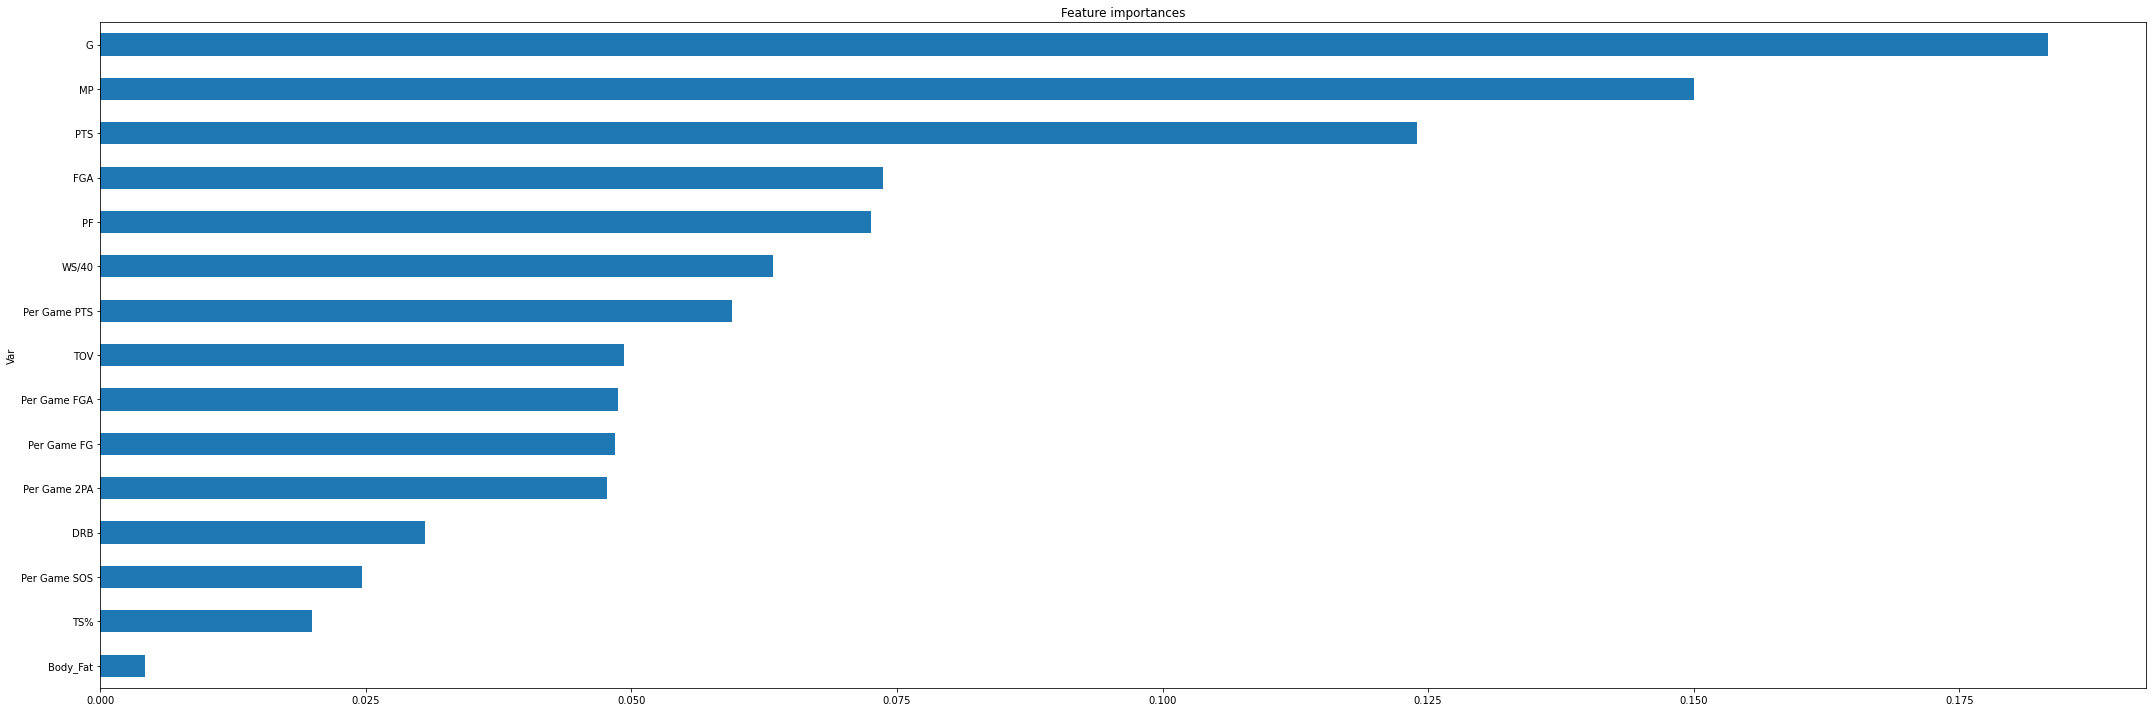

In [ ]:
pred = rf_model.predict(X_test)
pred_prob = rf_model.predict_proba(X_test)

pred = pred.astype(int)
y_test = y_test.astype(int)

importances = rf_model.feature_importances_

forest_importances = pd.Series(importances, index = df[feature_cols].columns).sort_values()
fig, ax = plt.subplots(figsize = (30, 10))
forest_importances.plot.barh()
ax.set_title("Feature importances")
ax.set_ylabel("Var")
fig.tight_layout()

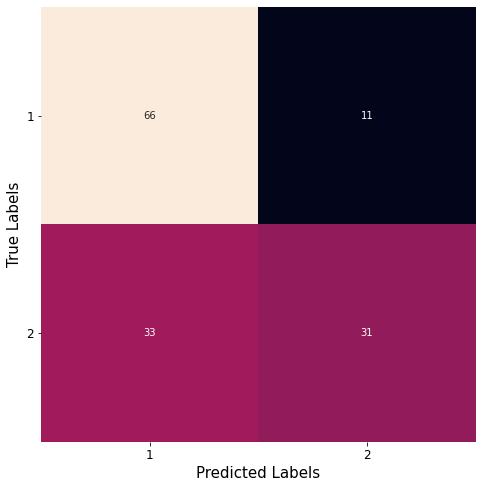

In [ ]:
from sklearn.metrics import confusion_matrix
,--
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels([1, 2], fontsize = 12)
ax.yaxis.set_ticklabels([1, 2], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        77
           2       0.74      0.48      0.58        64

    accuracy                           0.69       141
   macro avg       0.70      0.67      0.67       141
weighted avg       0.70      0.69      0.68       141



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

forest_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))

## gives you the points for the roc-curve 
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test[feature_cols])[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Forest_ROC')
plt.show()

ValueError: ignored